<div style="background-color:#3b5998; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>Twitch Top Streamers Analysis 💻🎮📈</b></h1>
</div>

<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://media.tenor.com/_Pg_DJWrql0AAAAC/thumpert-twitch.gif" alt="Animated GIF">
</div>

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [1]:
!pip3 install -q seaborn wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy  as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn           as sns
import base64
from IPython.display import display, HTML
from wordcloud import WordCloud
plt.style.use('dark_background')

In [3]:
data = pd.read_csv("/kaggle/input/twitchdata/twitchdata-update.csv")
data.head(3)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [5]:
data.shape

(1000, 11)

In [6]:
def streamer(x): # method to check stats of an individual streamer
    return data.loc[data['Channel'] == x]

def lang(x): # method to check the details about a streamer that streams in a particular language
    return data[data['Language'] == x][['Channel', 'Followers', 'Partnered', 'Mature']].head(10)

def streamtime(x): # method to check the streamer that had the most streaming time in our data
    return data.loc[data['Stream time(minutes)'] == x]

def watchtime(x): # method to check the streamer that had the most watch time in our data
    return data.loc[data['Watch time(Minutes)'] == x]

def avgviewers(x): # method to check the streamer that had the most number of average viewers
    return data.loc[data['Average viewers'] == x]

def follow(x): # method to check the streamer that had the most followers in our data
    return data.loc[data['Followers'] == x]

def followgained(x): # method to check the streamer that had the most followers gained in our data
    return data.loc[data['Followers gained'] == x]

def viewgained(x): # method to check the streamer that had the most views gained in our data
    return data.loc[data['Views gained'] == x]

<div style="background-color:#dfe3ee; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>EDA AND DATA ANALYSIS</b></h2>
</div>

In [7]:
data.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [8]:
data.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08



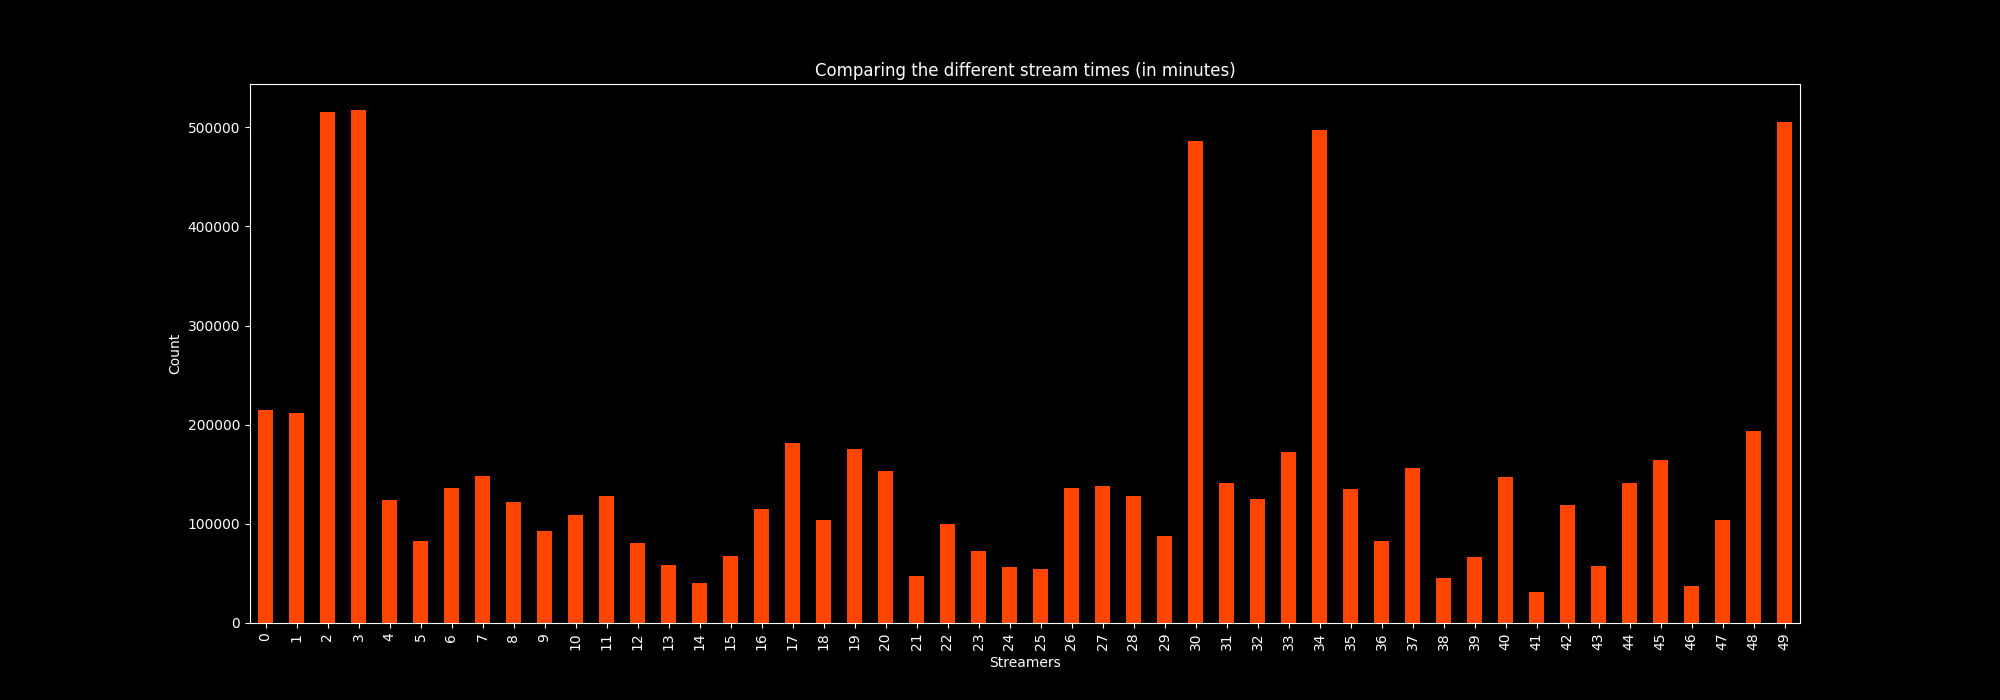

In [10]:
plt.figure(figsize=(20, 7))
data['Stream time(minutes)'].head(50).plot.bar(color='orangered')
plt.title('Comparing the different stream times (in minutes)')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.savefig('output_pie.png')
plt.close()
with open("output_pie.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


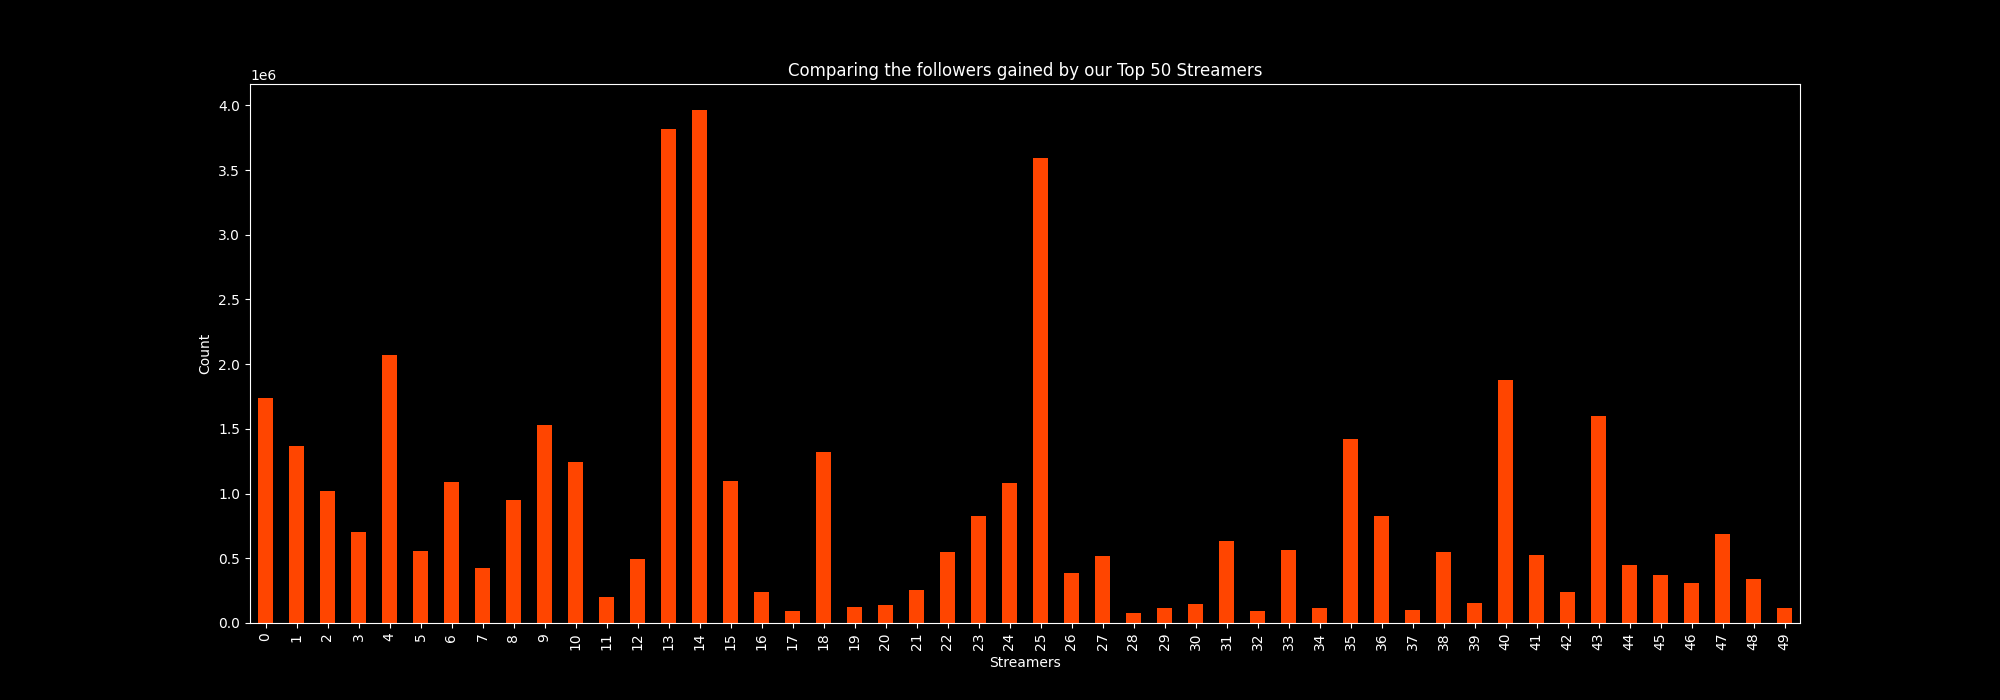

In [11]:
plt.figure(figsize=(20, 7))
data['Followers gained'].head(50).plot.bar(color='orangered')
plt.title('Comparing the followers gained by our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.savefig('output_followers.png')
plt.close()
with open("output_followers.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


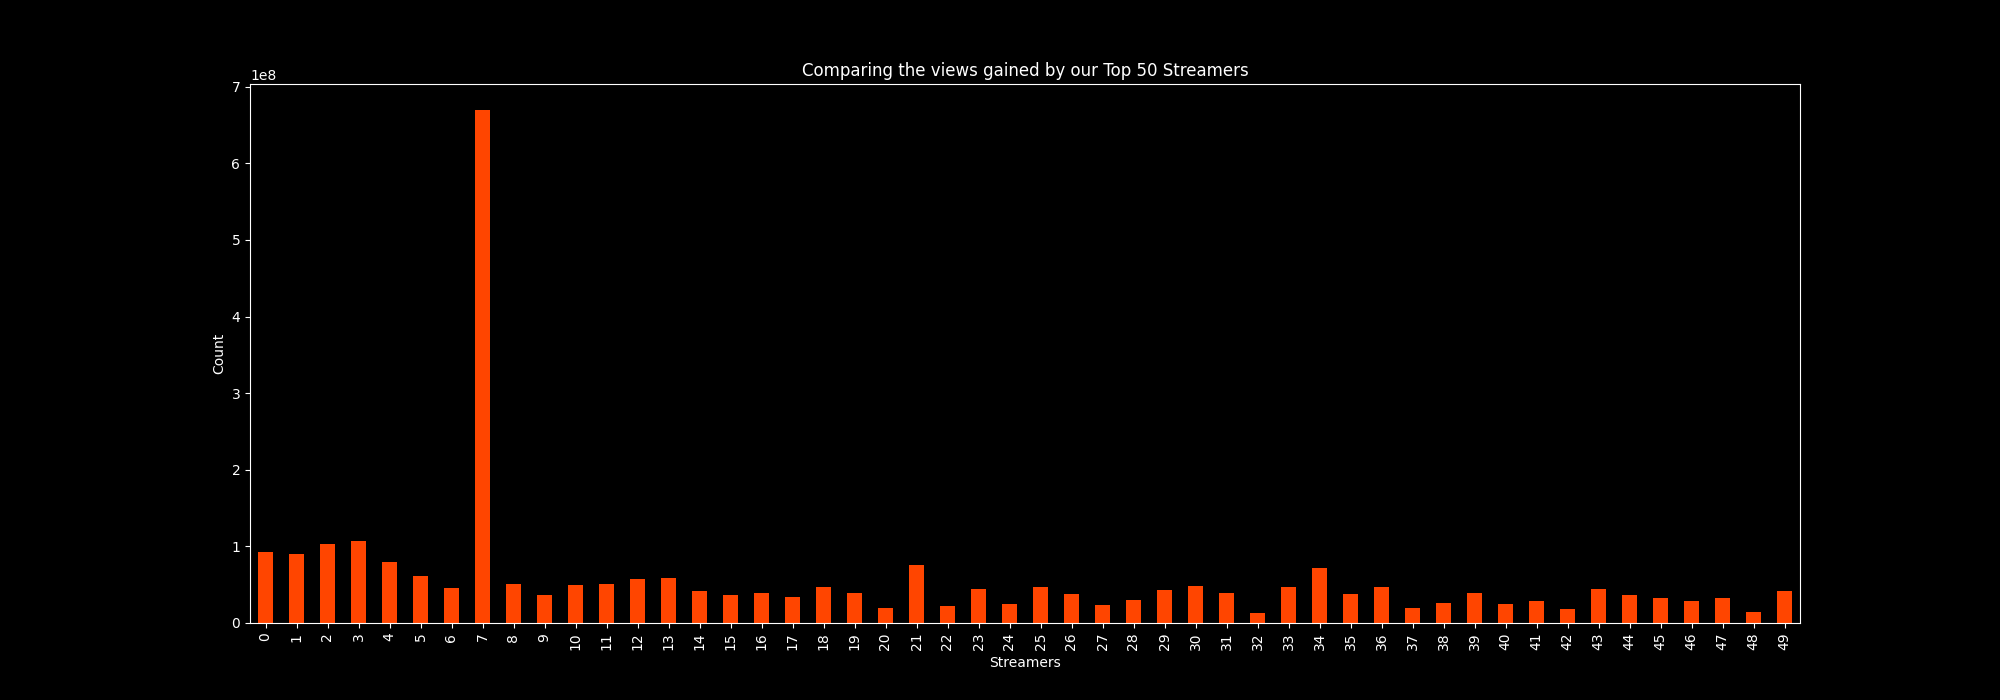

In [12]:
plt.figure(figsize=(20, 7))
data['Views gained'].head(50).plot.bar(color='orangered')
plt.title('Comparing the views gained by our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.savefig('output_views.png')
plt.close()
with open("output_views.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


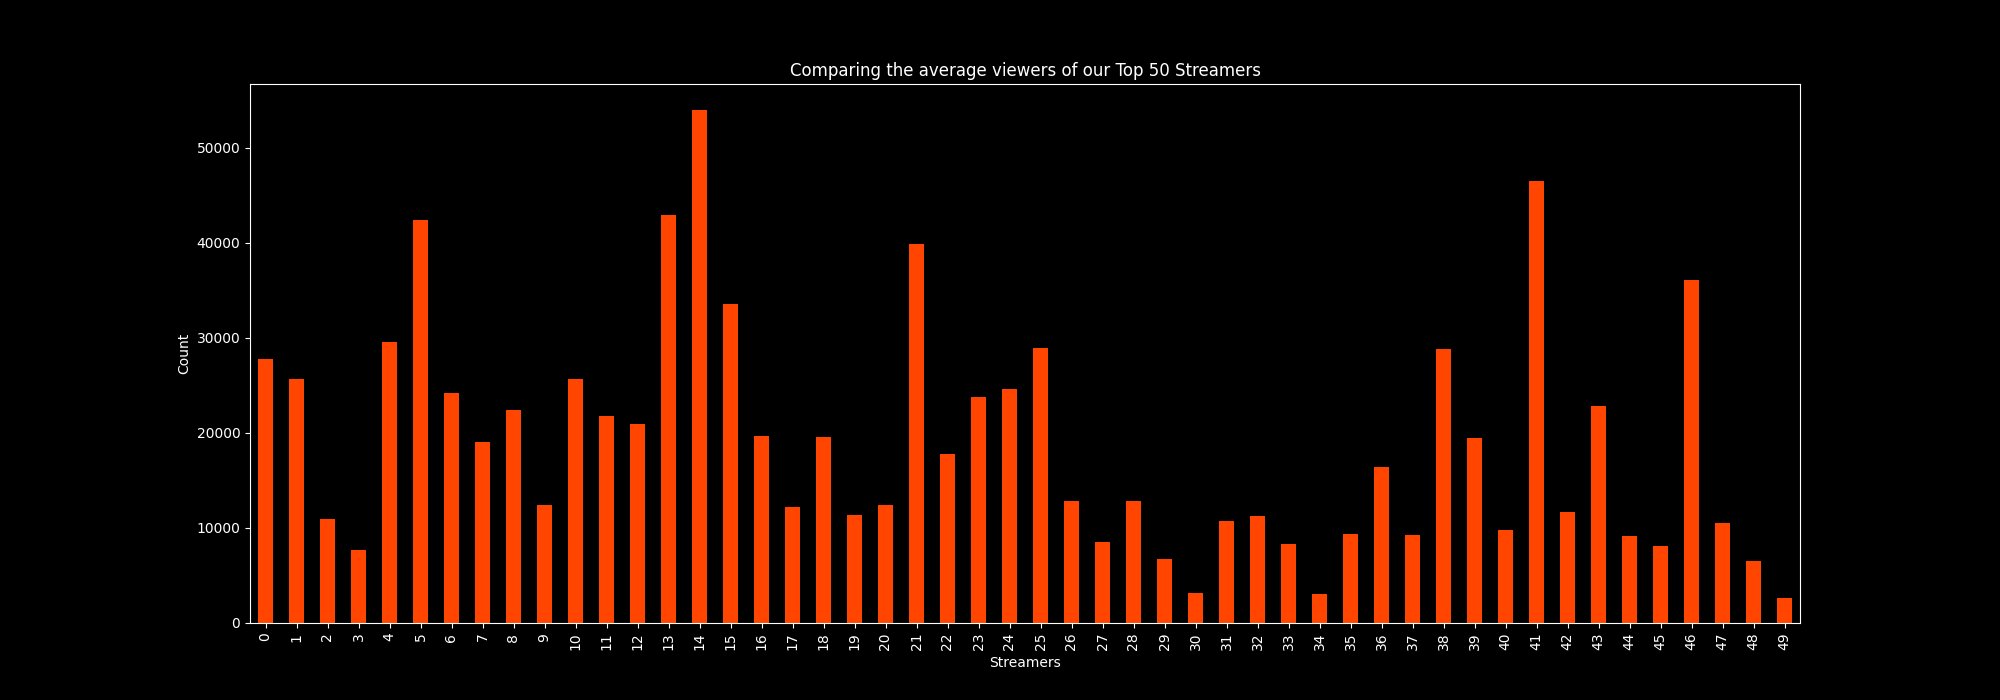

In [13]:
plt.figure(figsize=(20, 7))
data['Average viewers'].head(50).plot.bar(color='orangered')
plt.title('Comparing the average viewers of our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.savefig('output_average_viewers.png')
plt.close()
with open("output_average_viewers.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


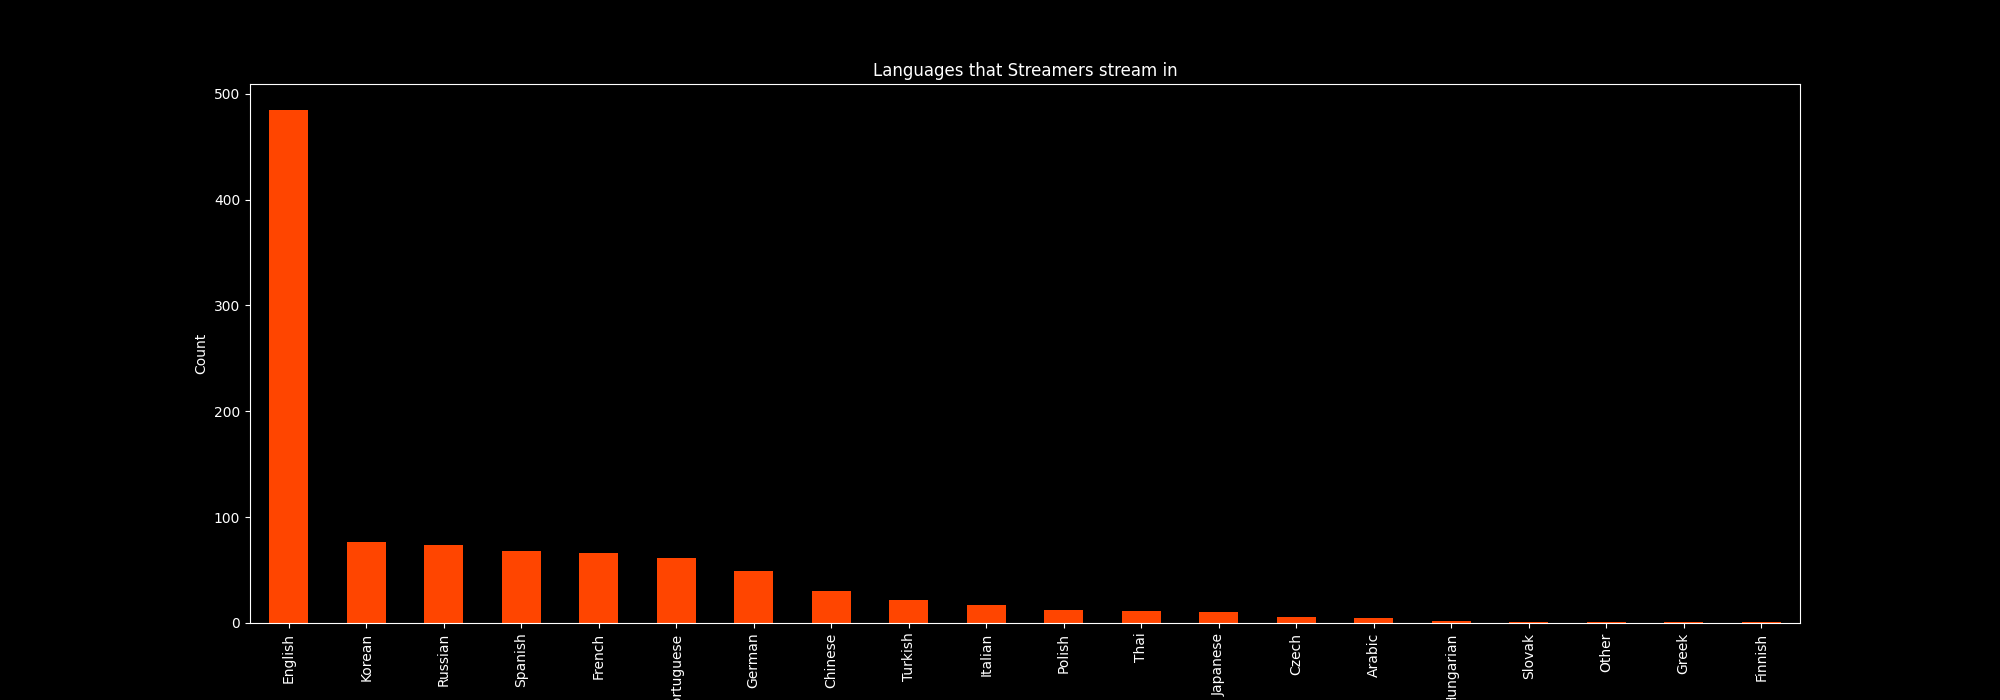

In [14]:
plt.figure(figsize=(20, 7))
data['Language'].value_counts().head(20).plot.bar(color='orangered')
plt.title('Languages that Streamers stream in')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.savefig('output_languages.png')
plt.close()
with open("output_languages.png", "rb") as img_file:
    img_data = img_file.read()
img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

/tmp/ipykernel_14/664047305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Partnered', data=data, palette='Oranges')



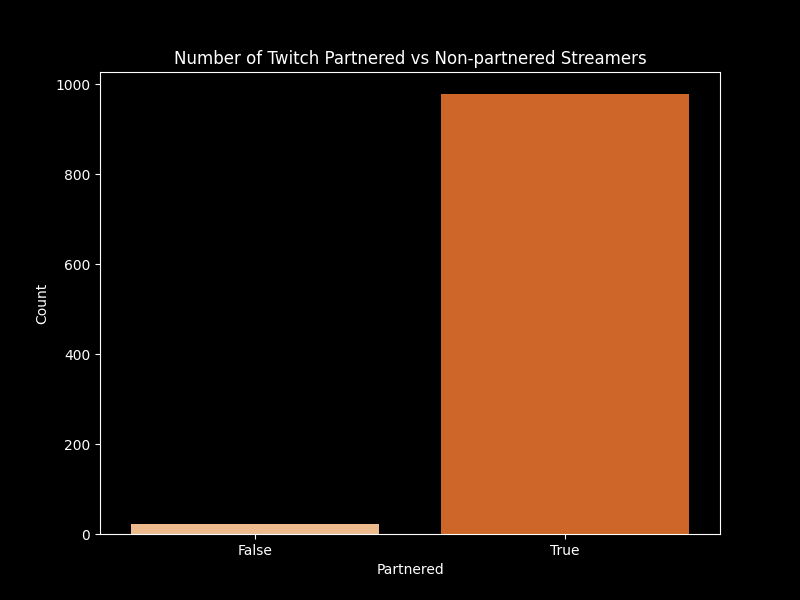

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partnered', data=data, palette='Oranges')
plt.title('Number of Twitch Partnered vs Non-partnered Streamers')
plt.xlabel('Partnered')
plt.ylabel('Count')
plt.savefig('output_partnered.png')
plt.close()
with open("output_partnered.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [16]:
data[data['Partnered'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
0,xQcOW,6196161750,215250,3246298
1,summit1g,6091677300,211845,5310163
2,Gaules,5644590915,515280,1767635
3,ESL_CSGO,3970318140,517740,3944850
4,Tfue,3671000070,123660,8938903
5,Asmongold,3668799075,82260,1563438
6,NICKMERCS,3360675195,136275,4074287
7,Fextralife,3301867485,147885,508816
8,loltyler1,2928356940,122490,3530767
9,Anomaly,2865429915,92880,2607076


/tmp/ipykernel_14/2581482791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mature', data=data, palette='Oranges')



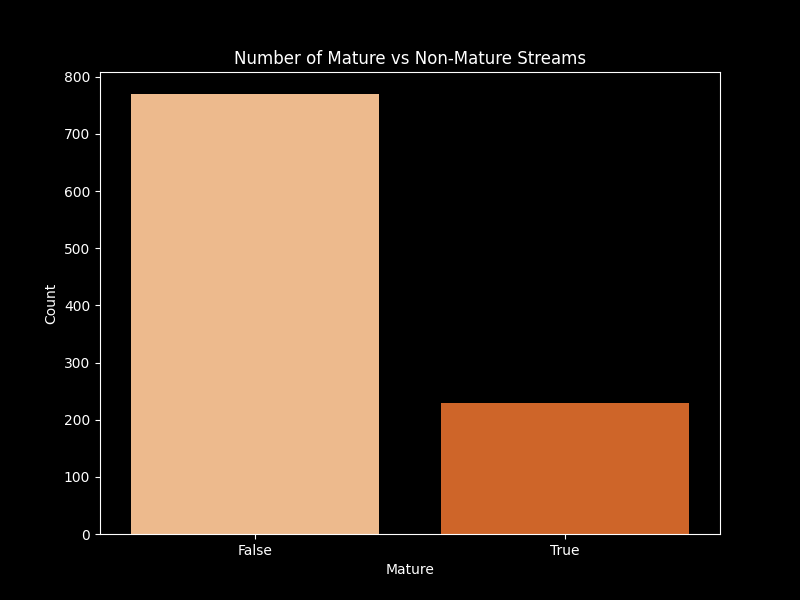

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Mature', data=data, palette='Oranges')
plt.title('Number of Mature vs Non-Mature Streams')
plt.xlabel('Mature')
plt.ylabel('Count')
plt.savefig('output_mature.png')
plt.close()
with open("output_mature.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [18]:
data[data['Mature'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10)

,Channel,Watch time(Minutes),Stream time(minutes),Followers
2,Gaules,5644590915,515280,1767635
10,TimTheTatman,2834436990,108780,5265659
15,MontanaBlack88,2408460990,67740,2911316
16,sodapoppin,2329440420,115305,2786162
24,TheRealKnossi,1811696100,56010,1260160
32,MOONMOON,1527882945,124680,923448
42,ROSHTEIN,1435735725,118995,381918
45,Sardoche,1361024835,164235,746865
55,Gorgc,1252711830,141135,391726
63,Quin69,1186941750,174270,538532



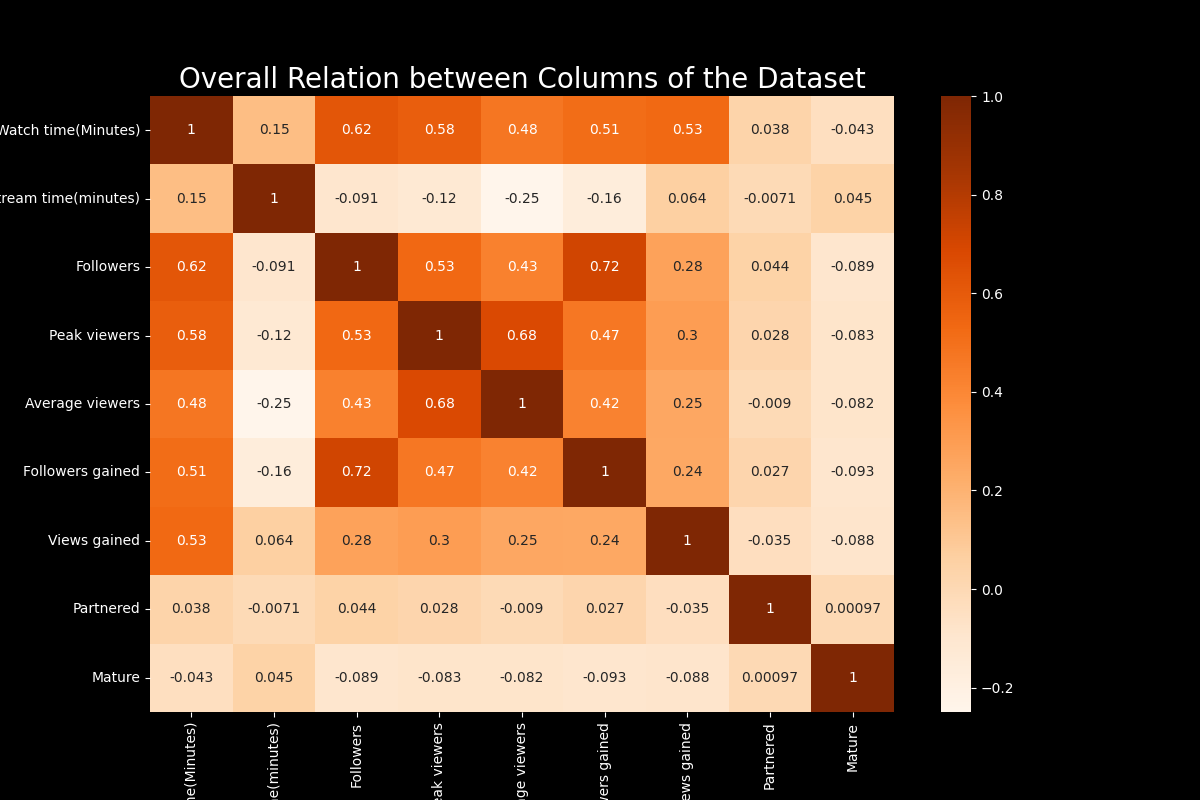

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['Watch time(Minutes)', 'Stream time(minutes)', 'Followers', 'Peak viewers', 'Average viewers', 'Followers gained', 'Views gained', 'Partnered', 'Mature']].corr(), annot=True, cmap='Oranges')
plt.title('Overall Relation between Columns of the Dataset', fontsize=20)
plt.savefig('output_correlation.png')
plt.close()
with open("output_correlation.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [20]:
streamer('Anomaly')

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [21]:
lang('Spanish')

,Channel,Followers,Partnered,Mature
13,Rubius,5751354,True,False
14,auronplay,3983847,True,False
25,TheGrefg,3795667,True,False
43,ibai,1894953,True,False
69,LVPes,587677,True,False
103,elded,2601858,True,False
105,juansguarnizo,1204773,True,False
129,ElmiilloR,426716,True,False
147,coscu,1865296,True,False
160,MYM_ALKAPONE,770535,True,False


/tmp/ipykernel_14/3112748676.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data['Stream time(minutes)'], y=data['Followers gained'], palette='Set1')



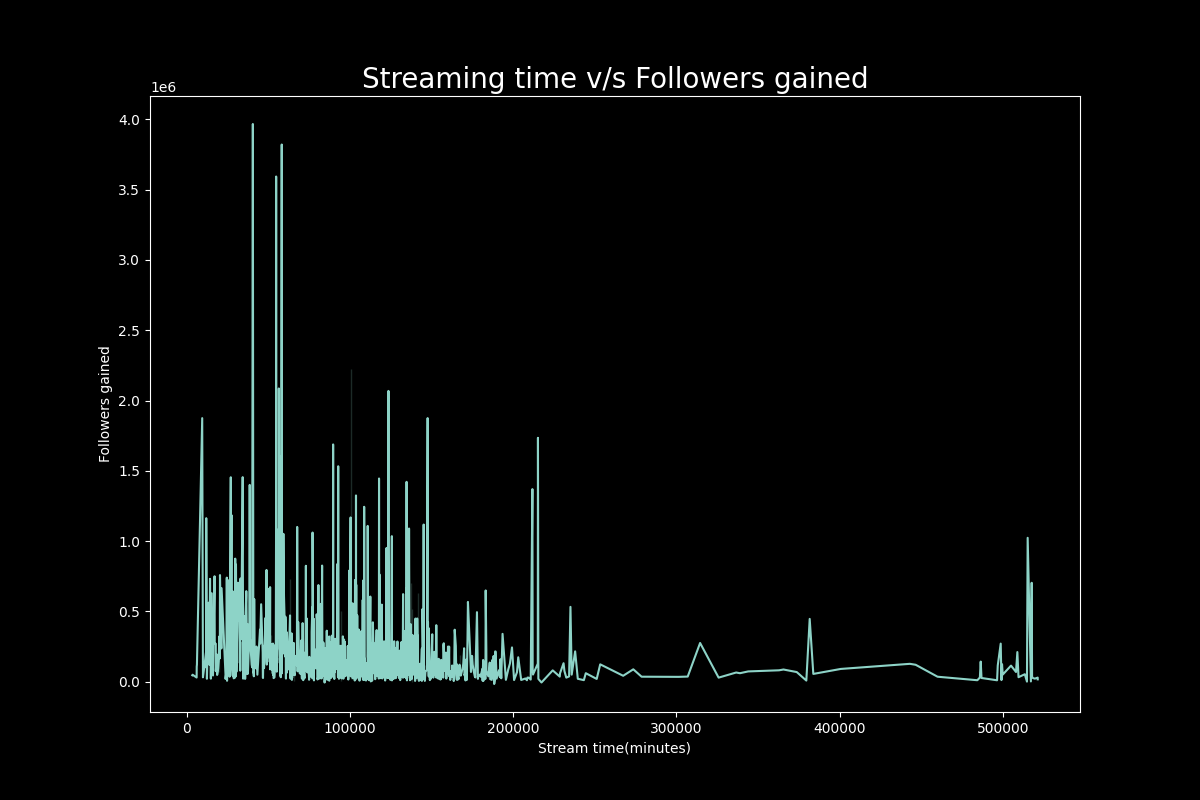

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=data['Stream time(minutes)'], y=data['Followers gained'], palette='Set1')
plt.title('Streaming time v/s Followers gained', fontsize=20)
plt.savefig('output_stream_followers.png')
plt.close()
with open("output_stream_followers.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code));

/tmp/ipykernel_14/1050080605.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data['Stream time(minutes)'], y=data['Average viewers'], palette='Set1')



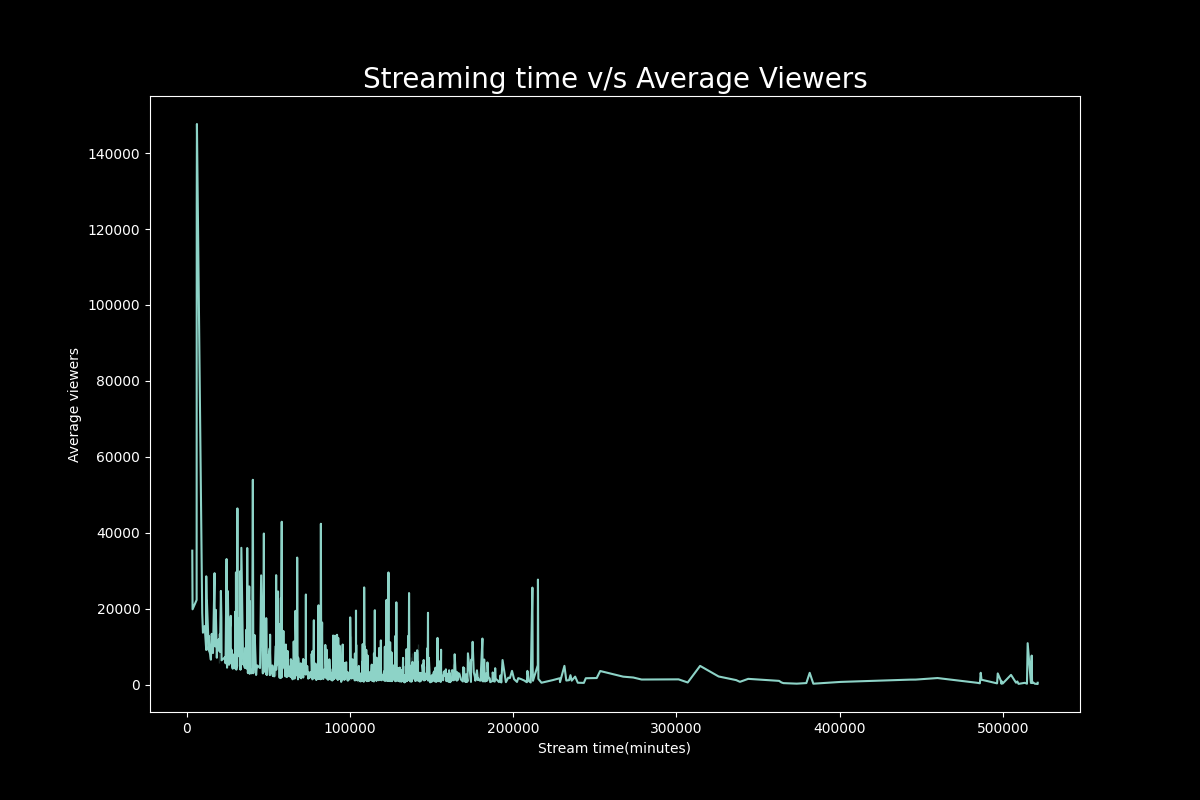

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=data['Stream time(minutes)'], y=data['Average viewers'], palette='Set1')
plt.title('Streaming time v/s Average Viewers', fontsize=20)
plt.savefig('output_stream_avgviewers.png')
plt.close()
with open("output_stream_avgviewers.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))

In [24]:
streamtime(data['Stream time(minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English


In [25]:
watchtime(data['Watch time(Minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [26]:
avgviewers(data['Average viewers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [27]:
follow(data['Followers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [28]:
followgained(data['Followers gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [29]:
viewgained(data['Views gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


/tmp/ipykernel_14/2687240078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df2['Channel'], y=df2['Followers'], palette="Set1")



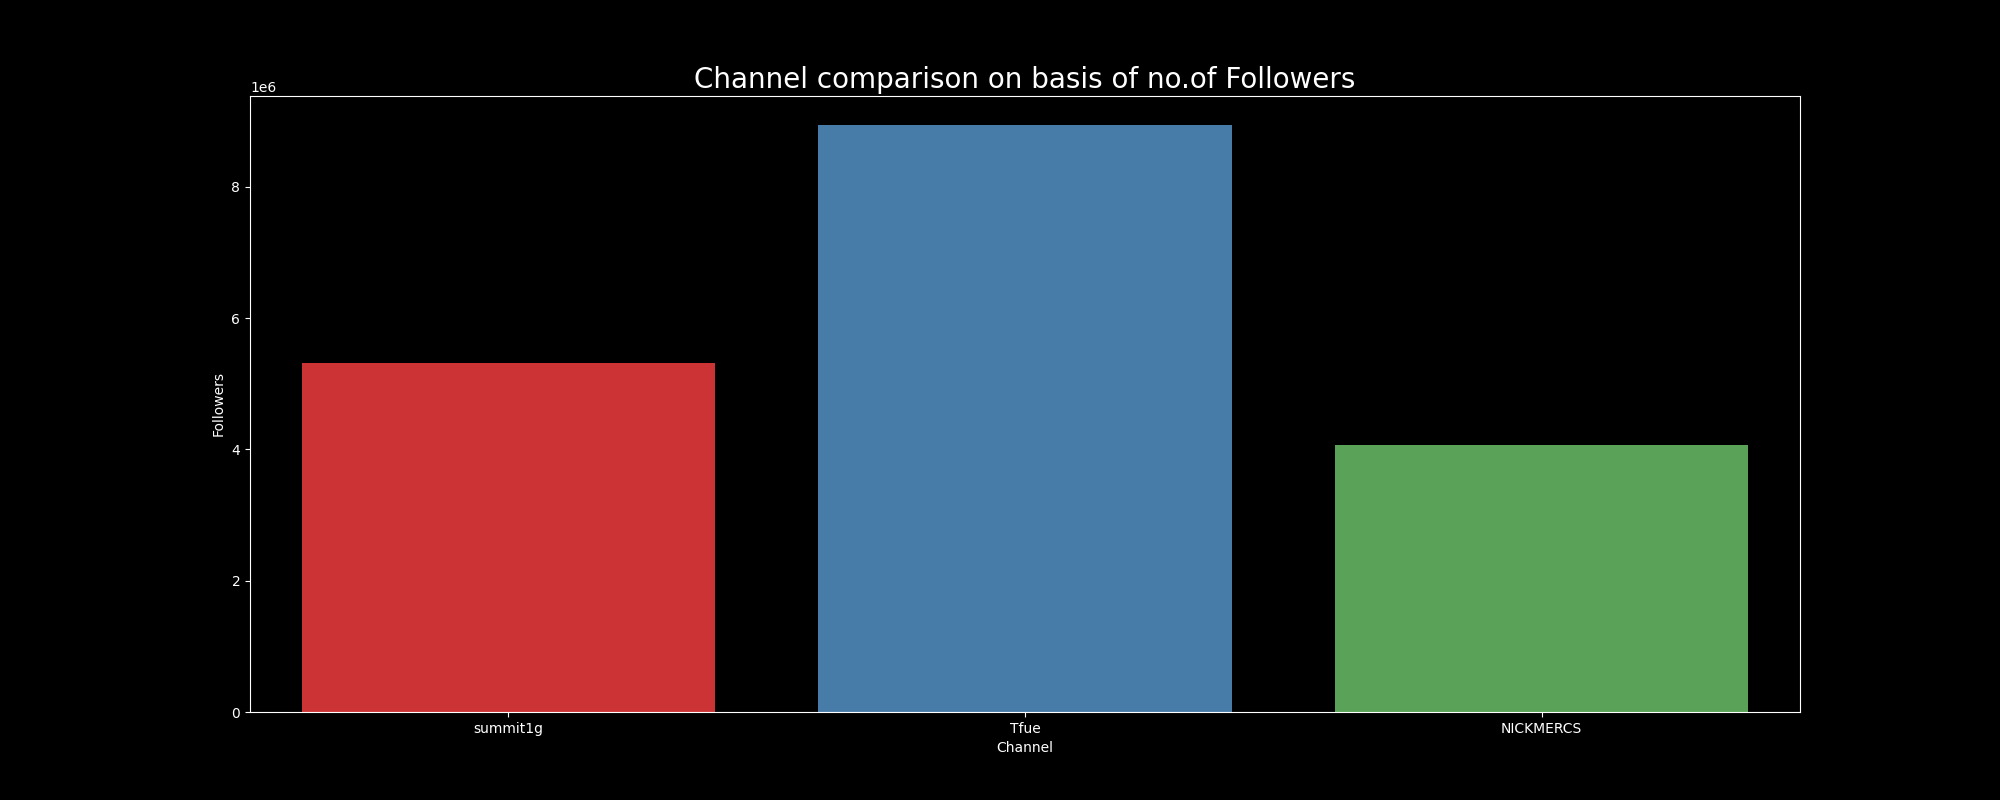

In [30]:
plt.figure(figsize=(20, 8))
top = ('Tfue', 'summit1g', 'NICKMERCS')
df2 = data.loc[data['Channel'].isin(top) & data['Followers']]

ax = sns.barplot(x=df2['Channel'], y=df2['Followers'], palette="Set1")
ax.set_title(label='Channel comparison on basis of no.of Followers', fontsize=20)
plt.savefig('output_channel_followers.png')
plt.close()
with open("output_channel_followers.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


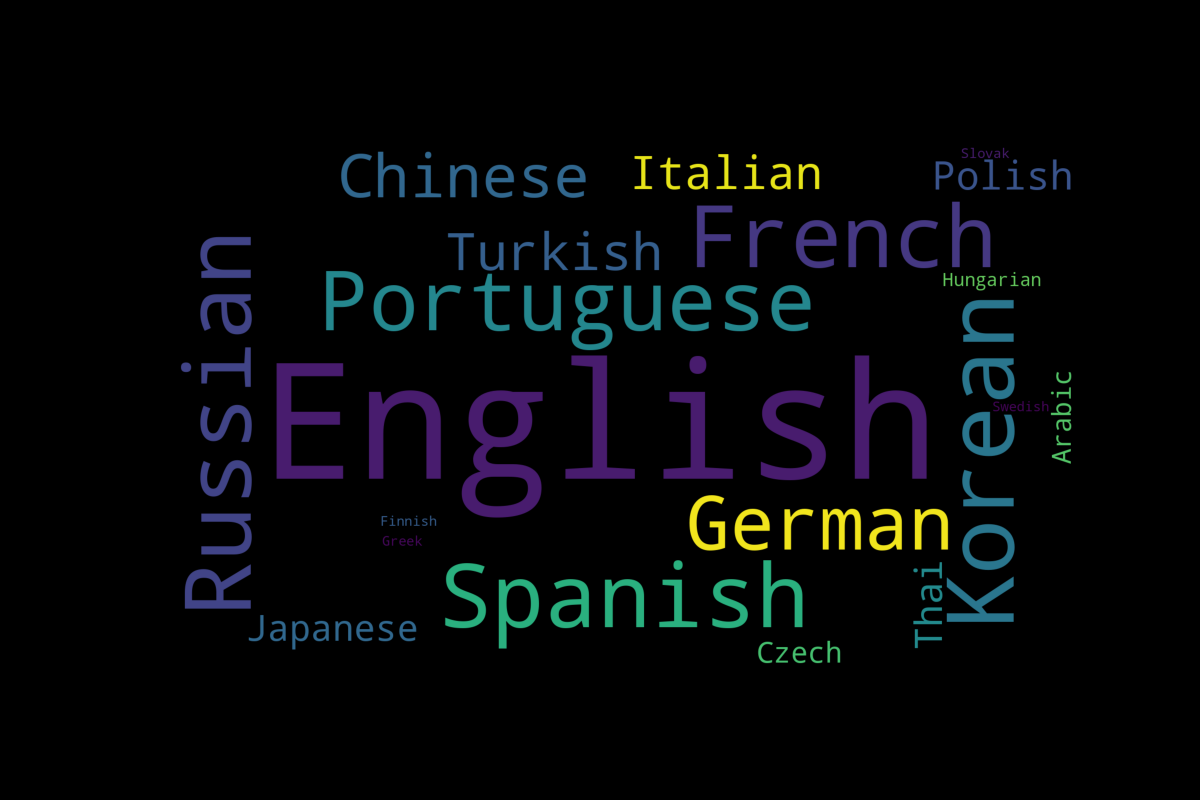

In [31]:
plt.subplots(figsize=(12, 8))
wordcloud = WordCloud(
    background_color='Black',
    width=1920,
    height=1080
).generate(" ".join(data.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('output_wordcloud.png')
plt.close()
with open("output_wordcloud.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))


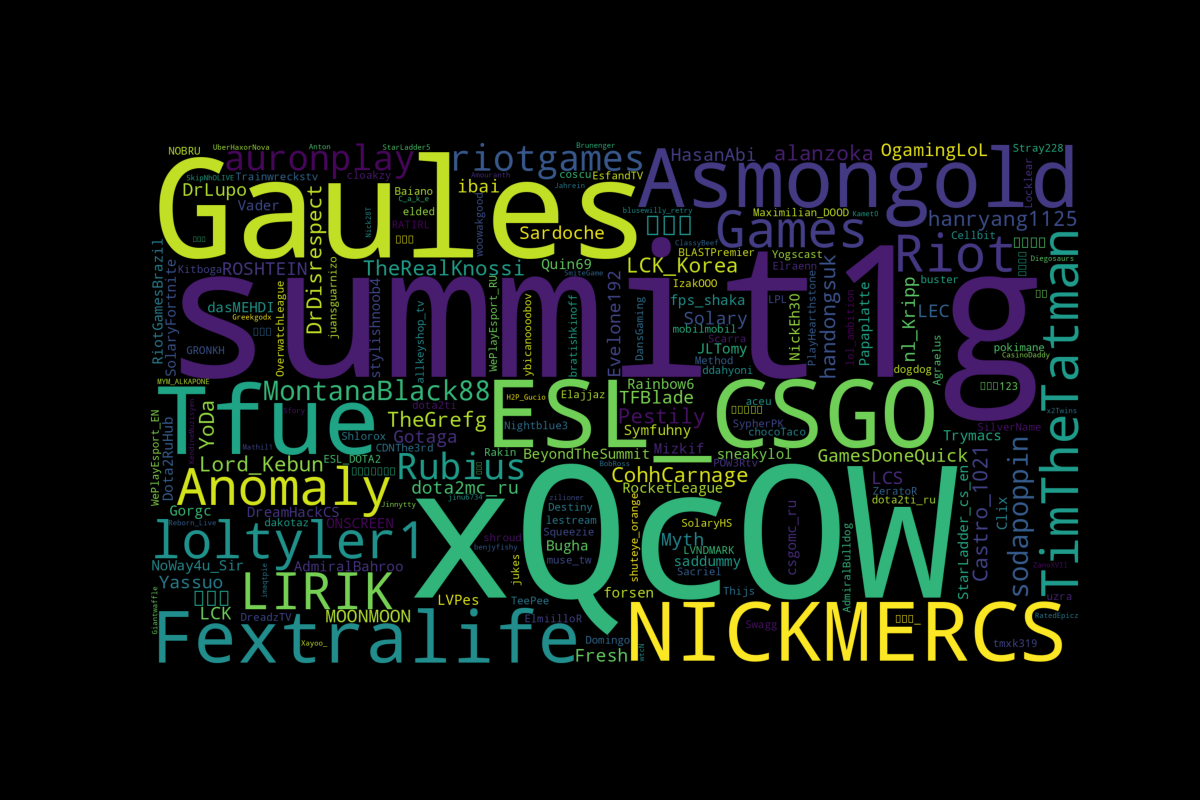

In [32]:
plt.subplots(figsize=(12, 8))
wordcloud = WordCloud(
    background_color='Black',
    width=1920,
    height=1080
).generate(" ".join(data.Channel))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('output_wordcloud_channel.png')
plt.close()
with open("output_wordcloud_channel.png", "rb") as img_file:
    img_data = img_file.read()

img_base64 = base64.b64encode(img_data).decode("utf-8")
html_code = f'''
<div style="background-color:black; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;">
    <img src="data:image/png;base64,{img_base64}" style="display: block; margin: 0 auto;">
</div>
'''
display(HTML(html_code))